### In this data set we have been given a table having column SMS with message(text) data and column class with labels as Spam and Ham 
### Main task is to identify the text in the test data set is SPAM 

data for this data is with name SMSSpamcollection


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [6]:
data = pd.read_table('SMSSpamCollection',header=None,names=['Class','SMS'])
data.head()

,Class,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
len(data)

5572

In [10]:
ham_spam = data.Class.value_counts()
ham_spam

ham     4825
spam     747
Name: Class, dtype: int64

In [11]:
print('SPam Rate in our data is : ',(747/(4825+747))*100)

SPam Rate in our data is :  13.406317300789663


In [14]:
data['label'] = data.Class.map({'ham':0,'spam':1})

In [15]:
data.head()

,Class,SMS,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [16]:
data.drop('Class',axis=1,inplace=True)

In [18]:
data.head()

,SMS,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [19]:
X= data.SMS
y= data.label

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=100)

In [22]:
print('train data shape = ',X_train.shape)
print('Test data shape = ',X_test.shape)

train data shape =  (4457,)
Test data shape =  (1115,)


In [23]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(stop_words='english')

In [24]:
vec.fit(X_train)

CountVectorizer(stop_words='english')

In [25]:
vec.vocabulary_

{'da': 2110,
 'page': 4901,
 'want': 7160,
 'beautiful': 1262,
 'girl': 3072,
 'ive': 3667,
 'seen': 5827,
 'baby': 1175,
 'come': 1880,
 'common': 1890,
 'room': 5657,
 'just': 3767,
 'sleeping': 6046,
 'surfing': 6439,
 'maybe': 4290,
 'westshore': 7253,
 'hyde': 3469,
 'park': 4940,
 'village': 7076,
 'place': 5082,
 'near': 4598,
 'house': 3421,
 'hi': 3340,
 'darlin': 2128,
 'work': 7350,
 'did': 2261,
 'trouble': 6834,
 'ijust': 3504,
 'talked': 6505,
 'mum': 4521,
 'morning': 4471,
 'really': 5446,
 'good': 3113,
 'time': 6692,
 'night': 4655,
 'im': 3514,
 'goin': 3099,
 'soon': 6139,
 'sad': 5711,
 'puppy': 5340,
 'noise': 4677,
 'hows': 3427,
 'champ': 1694,
 'leaving': 3957,
 'glasgow': 3082,
 'sorry': 6148,
 'll': 4050,
 'later': 3923,
 'ree': 5489,
 'entry': 2568,
 'weekly': 7226,
 'comp': 1892,
 'chance': 1697,
 'win': 7288,
 'ipod': 3634,
 'txt': 6882,
 'pod': 5130,
 '80182': 661,
 'std': 6278,
 'rate': 5413,
 'apply': 1014,
 '08452810073': 68,
 'details': 2238,
 '18': 3

In [27]:
len(vec.vocabulary_.keys())

7499

In [28]:
X_train_transformed = vec.transform(X_train)
X_test_transformed = vec.transform(X_test)

In [29]:
# note that the type is transformed (sparse) matrix
print(type(X_train_transformed))
#print(X_train_transformed)

<class 'scipy.sparse.csr.csr_matrix'>


# 1. Model Building : Multinomial Naive Bayes 

In [31]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train_transformed,y_train)
y_pred_class = mnb.predict(X_test_transformed)
y_pred_class_probability = mnb.predict_proba(X_test_transformed)

In [32]:
mnb

MultinomialNB()

In [33]:
from sklearn import metrics

In [34]:
metrics.accuracy_score(y_test,y_pred_class)

0.9865470852017937

In [35]:
metrics.confusion_matrix(y_test,y_pred_class)

array([[963,   5],
       [ 10, 137]], dtype=int64)

In [37]:
confusion = metrics.confusion_matrix(y_test,y_pred_class)
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]
TP = confusion[1,1]
print(confusion)

[[963   5]
 [ 10 137]]


In [38]:
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)

sensitivity 0.9319727891156463


In [39]:
specificity = TN / float(TN + FP)
print("specificity",specificity)

specificity 0.9948347107438017


In [40]:
precision = TP / float(TP + FP)
print("precision",precision)
print(metrics.precision_score(y_test, y_pred_class))

precision 0.9647887323943662
0.9647887323943662


In [41]:
print("precision",precision)
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred_class))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred_class))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred_class))

precision 0.9647887323943662
PRECISION SCORE : 0.9647887323943662
RECALL SCORE : 0.9319727891156463
F1 SCORE : 0.9480968858131488


In [42]:
y_pred_class

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [43]:
from sklearn.metrics import confusion_matrix as skconfusion_matrix
from sklearn.metrics import roc_curve,auc
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_pred_class_probability[:,1])
roc_auc = auc(false_positive_rate,true_positive_rate)

In [44]:
print(roc_auc)

0.985937763535166


In [46]:
pd.DataFrame({'Threshold': threshold, 
              'TPR': true_positive_rate, 
              'FPR':false_positive_rate
             })

,Threshold,TPR,FPR
0,2.000000e+00,0.000000,0.000000
1,1.000000e+00,0.299320,0.000000
2,1.000000e+00,0.326531,0.000000
3,1.000000e+00,0.340136,0.000000
4,1.000000e+00,0.367347,0.000000
...,...,...,...
90,1.144541e-12,1.000000,0.962810
91,1.018069e-12,1.000000,0.964876
92,6.114609e-15,1.000000,0.985537
93,5.730234e-15,1.000000,0.987603


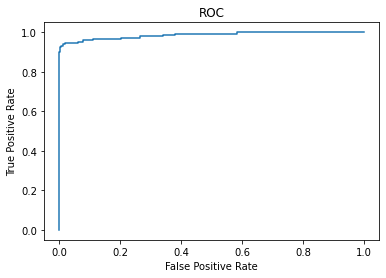

In [47]:
# plotting the ROC curve
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)

# 2. Model Building : Bernouli Naive Bayes 

### **Simply put, Bernoulli Naive Bayes is concerned only with whether the word is present or not in a document, whereas Multinomial Naive Bayes counts the no. of occurrences of the words as well.**

In [48]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()

In [49]:
bnb.fit(X_train_transformed,y_train)
y_pred_class = bnb.predict(X_test_transformed)
y_pred_class_probability = bnb.predict_proba(X_test_transformed)

In [50]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred_class)

0.9721973094170404

In [54]:
bnb

BernoulliNB()

In [56]:
metrics.confusion_matrix(y_test,y_pred_class)

array([[967,   1],
       [ 30, 117]], dtype=int64)

In [57]:
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)

sensitivity 0.9319727891156463


In [58]:
specificity = TN / float(TN + FP)
print("specificity",specificity)

specificity 0.9948347107438017


In [59]:
precision = TP / float(TP + FP)
print("precision",precision)
print(metrics.precision_score(y_test, y_pred_class))

precision 0.9647887323943662
0.9915254237288136


In [60]:
precision = TP / float(TP + FP)
print("precision",precision)
print(metrics.precision_score(y_test, y_pred_class))

precision 0.9647887323943662
0.9915254237288136


In [61]:
print("precision",precision)
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred_class))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred_class))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred_class))

precision 0.9647887323943662
PRECISION SCORE : 0.9915254237288136
RECALL SCORE : 0.7959183673469388
F1 SCORE : 0.8830188679245283


#### In this case, you wanted the False positives i.e the ham being classified as spam as low as possible which you could achieve by using Bernoulli Naive Bayes classifier even though the overall accuracy and sensitivity was less than Multinomial Naive Bayes classifier.